# Predicting the Output Power of a Combined Cycle Power Plant using Multiple Regression

## Background
Combined cycle power plants are power generation plants that use both gas and steam turbines together to generate electricity. The waste heat generated from the gas turbine is used to produce steam which is fed to a steam turbine to generate even more electricity. This increases the power produced (up to 50% more) for the same amount of fuel, as well as increases the plant’s efficiency to about 60%. The Output power of the Combined Cycle Power Plant (CCPP) is dependent on a few parameters which are atmospheric pressure, exhaust steam pressure, ambient temperature, and relative humidity. Being able to predict the full load electrical power output is important for the efficient and economic operation of the power plant

This tutorial builds a predictive model using a Multiple Regression algorithm to predict the full load output power of a CCPP. It would use the dataset provided by Pinar Tufekci which is available at the UCI Machine Learning repository. 

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant?ref=datanews.io

## 1.0 Import Libraries
Before we load our dataset, it is important that we first import all the necessary Python Libraries that we will need in building our Machine Learning model. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Next, we load our dataset 

In [6]:
data = pd.read_csv(r'C:\Users\TIM\Desktop\AI Research Materials\Datasets\Regression\CCPP.csv')

In [7]:
#AT = Ambient Temp, AP = Ambient Pressure, RH = Relative Humidity, V = Exhaust Vacuum, 
#PE(to be predict): Produced Energy - Electrical Energy output

data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## 2.0 Exploratory Data Analysis
Next, we explore our dataset to get a feel of it. 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


We can also explore for missing values using the klib Library

In [9]:
import klib
klib.missingval_plot(data)

No missing values found in the dataset.


We can see that this dataset consists of 5 numerical variables (float64). There are no missing values (9568 non-null) across all the variables.This is certainly good news, as we have a clean dataset.

Next, we look at the distribution of the dataset

In [10]:
data.describe()

,AT,V,AP,RH,PE
count,9568.00,9568.00,9568.00,9568.00,9568.00
mean,19.65,54.31,1013.26,73.31,454.37
std,7.45,12.71,5.94,14.60,17.07
min,1.81,25.36,992.89,25.56,420.26
25%,13.51,41.74,1009.10,63.33,439.75
50%,20.34,52.08,1012.94,74.97,451.55
75%,25.72,66.54,1017.26,84.83,468.43
max,37.11,81.56,1033.30,100.16,495.76


The dataset consists of 4 hourly average variables or features and the target variable which is the Output Power (PE)
- Ambient Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89–1033.30 millibar,
- Relative Humidity (RH) in the range of 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36–81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26–495.76 MW

Next we 'frame' our data using Pandas DataFrame command

In [11]:
df = pd.DataFrame(data)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Because the goal of regression is to create a mathematical model from the features to predict the target variable (PE), we need to ensure that we select features that have a strong correlation (high predictive power) with the target. A correlation matrix would be useful in doing this.

Next, we visualise the correlation matrix using seaborn. First, we need to import the Seaborn Library

<AxesSubplot:>

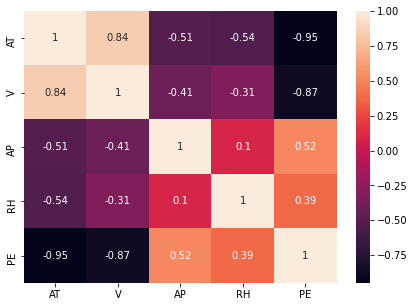

In [13]:
import seaborn as sns
plt.figure(figsize = (7, 5))
sns.heatmap(df.corr(), annot = True)

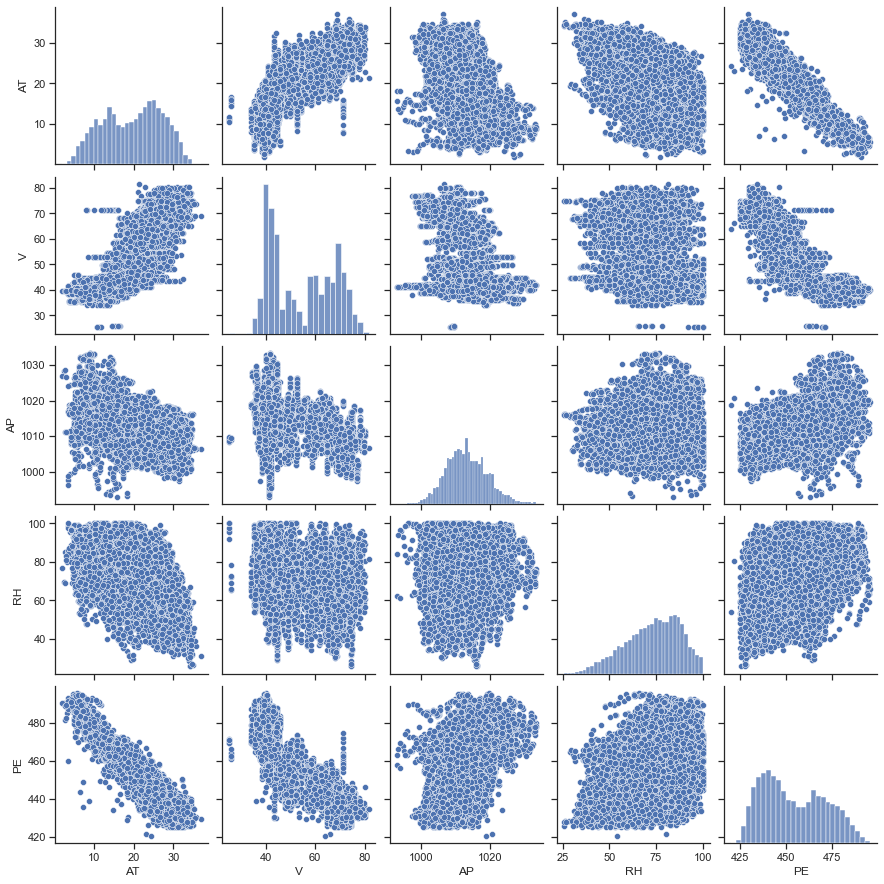

In [14]:
# show the correlation matrix for all the variables. our target variable here is PE
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, diag_kind = 'hist') #the diagonal shows the distribution of each variable, the options for diag_kind are: hist, auto, kde, none

## 3.0 Feature Engineering
A critical part of the success of a machine learning project is coming up with a good set of features or predictors to train on. Feature selection involves selecting the most useful features to train on amongst existing features

In [15]:
df_1 = df['AT']

In [16]:
df_2 = df[['AT', 'V']]

In [17]:
df_3 = df[['AT', 'V', 'RH']]

In [19]:
df_4 = df.loc[:,df.columns != 'PE']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [20]:
df_4.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


#### Model 1 

In [57]:
X1 = df_1

In [58]:
X1.head()

0    8.34
1   23.64
2   29.74
3   19.07
4   11.80
Name: AT, dtype: float64

#### Model 2

In [36]:
X2 = df_2

In [38]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
dtypes: float64(2)
memory usage: 149.6 KB


#### Model 3

In [39]:
X3 = df_3

In [40]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   RH      9568 non-null   float64
dtypes: float64(3)
memory usage: 224.4 KB


#### Model 4

In [21]:
X = df_4

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
dtypes: float64(4)
memory usage: 299.1 KB


In [23]:
#Checking for Multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [24]:
calc_vif(X)

,variables,VIF
0,AT,39.16
1,V,74.97
2,AP,66.62
3,RH,40.70


In [41]:
y = new_df[['PE']]

## 4.0 Training the Model 

   ### 4.0.1 Splitting the dataset
   We will split the dataset into an 80% training set and a 20% test set (using Pareto Principle).The training set would be  used to create the mathematical model of the relationship between the features and the target variable. The test set would be used to validate the model.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 4.0.2 Training the ML algorithm
Finally, we have gotten to the exciting part where we implement a regression algorithm and develop our predictive model. To do this, we will be using OLS Regression, Decision Tree Regression, and Random Forest Regression

### Tip: Lazy Predict 
lazypredict is a very useful python library that helps us to quickly build models to our dataset and assess their performance.

We will be using this Python Library to train and assess the performance various Regression models. LazyPredict is a very useful feature that helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

Model 2

In [59]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)

In [62]:
import lazypredict

In [64]:
#Here we will use the LazyPredict Library to evaluate the performance on several Regression algorithms
from lazypredict.Supervised import LazyRegressor 
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X2_train, X2_test, y_train, y_test)

 95%|██████████████████████████████████████████████████████████████████████████████▏   | 41/43 [02:58<00:05,  2.71s/it]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [03:00<00:00,  4.20s/it]


In [65]:
models

,R-Squared,RMSE,Time Taken
Model,,,
XGBRegressor,0.96,3.20,1.56
LGBMRegressor,0.95,3.61,0.56
HistGradientBoostingRegressor,0.95,3.62,2.27
RandomForestRegressor,0.95,3.64,5.19
BaggingRegressor,0.95,3.86,0.46
GradientBoostingRegressor,0.95,3.95,1.19
ExtraTreesRegressor,0.95,3.96,2.71
KNeighborsRegressor,0.94,4.30,0.14
NuSVR,0.93,4.34,8.38


model 3

In [66]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 42)

In [67]:
import lazypredict

In [68]:
#Here we will use the LazyPredict Library to evaluate the performance on several Regression algorithms
from lazypredict.Supervised import LazyRegressor 
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X3_train, X3_test, y_train, y_test)

 95%|██████████████████████████████████████████████████████████████████████████████▏   | 41/43 [02:53<00:03,  1.83s/it]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [02:55<00:00,  4.08s/it]


In [69]:
models

,R-Squared,RMSE,Time Taken
Model,,,
XGBRegressor,0.97,3.10,1.35
RandomForestRegressor,0.96,3.40,4.79
LGBMRegressor,0.96,3.41,0.39
HistGradientBoostingRegressor,0.96,3.43,2.48
ExtraTreesRegressor,0.96,3.50,3.34
BaggingRegressor,0.95,3.60,0.62
GradientBoostingRegressor,0.95,3.81,1.70
KNeighborsRegressor,0.94,4.02,0.12
SVR,0.94,4.12,6.74


Model 4 ['AT', 'V', 'RH','AP]

In [27]:
import lazypredict

In [28]:
#Here we will use the LazyPredict Library to evaluate the performance on several Regression algorithms
from lazypredict.Supervised import LazyRegressor 
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 93%|████████████████████████████████████████████████████████████████████████████▎     | 40/43 [03:35<00:08,  2.85s/it]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [03:40<00:00,  5.12s/it]


In [29]:
models

,R-Squared,RMSE,Time Taken
Model,,,
XGBRegressor,0.97,3.04,3.96
RandomForestRegressor,0.96,3.19,9.44
ExtraTreesRegressor,0.96,3.19,3.60
LGBMRegressor,0.96,3.23,1.01
HistGradientBoostingRegressor,0.96,3.26,4.50
BaggingRegressor,0.96,3.40,0.61
KNeighborsRegressor,0.95,3.70,0.25
GradientBoostingRegressor,0.95,3.73,3.02
SVR,0.94,4.03,9.66


Here, we use the conventional approach to try out the various Regression models for Model 4 to evaluate the best performance. This can be repeated for Model 1, 2 and 3.

In [79]:
#implementing a regression algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = regressor.predict(X_test)

In [81]:
#implementing a Decision Tree regression algorithm
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
dtr_pred = dt_regressor.predict(X_test) #For decision tree regressor predictions

In [83]:
#implementing a Random Forest regression algorithm
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
rf_pred = rf_regressor.predict(X_test) #For random forest regressor predictions

### 5.0 Model Performance Evaluation
Whenever a machine learning model is developed, it is important that its performance is evaluated to ensure it is yielding useful outputs and not overfitting. For Regression problems, there are 3 key performance metrics that are used to assess how well your model is performing.

In [89]:
# finds the MSE by comparing the test target variable with that of the predicted
# Need to simply this by making it a function or class
from sklearn.metrics import mean_squared_error
lin_mse_lr = mean_squared_error(y_test, y_pred)
lin_mse_dtr = mean_squared_error(y_test, dtr_pred)
lin_mse_rf = mean_squared_error(y_test, rf_pred)

In [95]:
#RMSE (Cost function)
lin_rmse = np.sqrt(lin_mse)
lin_rmse_dtr = np.sqrt(lin_mse_dtr)
lin_rmse_rf = np.sqrt(lin_mse_rf)
print ('the RMSE value for Linear Regressor is', round(lin_rmse,2))
print ('the RMSE value for Decision Tree Regressor is', round(lin_rmse_dtr,2))
print ('the RMSE value for Random Tree Regressor is', round(lin_rmse_rf,2))

the RMSE value for Linear Regressor is 4.43
the RMSE value for Decision Tree Regressor is 4.47
the RMSE value for Random Tree Regressor is 3.19


In [96]:
#Finding out the R2 score
from sklearn.metrics import r2_score as r2

In [97]:
#R2 score
r2_lr = r2(y_test, y_pred)
r2_dtr = r2(y_test, dtr_pred)
r2_rf = r2(y_test, rf_pred)
print ('the R-squared for Linear Regressor is', round(r2_lr,2))
print ('the R-squared for Decision Tree Regressor is', round(r2_dtr,2))
print ('the R-squared for Random Tree Regressor is', round(r2_rf,2))

the R-squared for Linear Regressor is 0.93
the R-squared for Decision Tree Regressor is 0.93
the R-squared for Random Tree Regressor is 0.96


# Conclusion
At the beginning of this article, we set out to develop a predictive model for full-load output power (PE) based on the dataset provided. We explored the dataset to find out if we had missing values or other problems, then played around with 4 features subset selections on 3 different machine learning regression algorithms (Linear Regressor, Decision Tree Regressor, Random Forest Regressor). 

We were able to discover that using a complete set of parameters or features on the Random Forest Regression algorithm yielded the best results amongst the three. We obtained an R-squared of 0.96 and RMSE of 3.19.

Additional:
Using LazyPredict we discovered that amongst lots of other regression algorithms, XGBRegressor gave is the best overall preformance with an R-squared of 0.97 and RMSE of 3.04. It also took a slower time to build the model (3.96s) compared to the second best Random Forest Regressor. 

Enjoy